In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/Aditya1Jhaveri/cervix-cancer-Deep-learning.git

Cloning into 'cervix-cancer-Deep-learning'...
remote: Enumerating objects: 53276, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 53276 (delta 8), reused 39 (delta 5), pack-reused 53234
Receiving objects: 100% (53276/53276), 1.75 GiB | 39.42 MiB/s, done.
Resolving deltas: 100% (214/214), done.
Updating files: 100% (50899/50899), done.


In [ ]:
import tensorflow as tf
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization,Flatten
from keras.models import Model
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from sklearn import preprocessing
from keras.utils import to_categorical



# Set your data directories and parameters
train_data_dir = '/content/cervix-cancer-Deep-learning/NEW_DATASET/train'
test_data_dir = '/content/cervix-cancer-Deep-learning/NEW_DATASET/test'
val_data_dir = '/content/cervix-cancer-Deep-learning/NEW_DATASET/validation'


img_width, img_height = 224, 224
batch_size = 16
base_learning_rate = 0.001  # Adjust as needed

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    fill_mode='nearest'
)

# Data preprocessing for validation

val_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    fill_mode='nearest'
)

# Data preprocessing for test
test_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    fill_mode='nearest'
)

# Load the data using data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # Automatically one-hot encodes labels
    shuffle=True  # Shuffle the data
)
print(f"Found {train_generator.samples} images belonging to {len(train_generator.class_indices)} classes in train dataset.")

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # Automatically one-hot encodes labels
    shuffle=False  # No need to shuffle test data
)
print(f"Found {test_generator.samples} images belonging to {len(test_generator.class_indices)} classes in test dataset.")

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # Automatically one-hot encodes labels
    shuffle=False  # No need to shuffle test data
)
print(f"Found {val_generator.samples} images belonging to {len(val_generator.class_indices)} classes in validation dataset.")


Found 12110 images belonging to 7 classes.
Found 12110 images belonging to 7 classes in train dataset.
Found 2083 images belonging to 7 classes.
Found 2083 images belonging to 7 classes in test dataset.
Found 3111 images belonging to 7 classes.
Found 3111 images belonging to 7 classes in validation dataset.


In [ ]:
import numpy as np
import tensorflow as tf

# Load the pre-trained models
resnet50v2 = tf.keras.models.load_model('/content/drive/MyDrive/Model/ResNet50V2_model.h5')
resnet101 = tf.keras.models.load_model('/content/drive/MyDrive/Model/ResNet101V2_model.h5')
densenet121 = tf.keras.models.load_model('/content/drive/MyDrive/Model/DenseNet121_model.h5')
densenet169 = tf.keras.models.load_model('/content/drive/MyDrive/Model/DenseNet169_model.h5')
xceptionnet = tf.keras.models.load_model('/content/drive/MyDrive/Model/XceptionNet_model.h5')
inceptionresnetv2 = tf.keras.models.load_model('/content/drive/MyDrive/Model/InceptionResNetV2_model.h5')


# **ResNet50V2**

In [ ]:
# resnet50v2 = tf.keras.models.load_model('/content/drive/MyDrive/Model/ResNet50V2_model.h5')

In [ ]:
train_loss, train_accuracy = resnet50v2.evaluate(train_generator)

print(f'Train accuracy: {train_accuracy:.4f}')

757/757 [==============================] - 278s 356ms/step - loss: 0.0384 - accuracy: 0.9881
Train accuracy: 0.9881


In [ ]:
# Evaluate the model on the test data using the test generator
test_loss, test_accuracy = resnet50v2.evaluate(test_generator)

print(f'Test accuracy: {test_accuracy:.4f}')

131/131 [==============================] - 34s 262ms/step - loss: 0.0686 - accuracy: 0.9794
Test accuracy: 0.9794


131/131 [==============================] - 36s 269ms/step


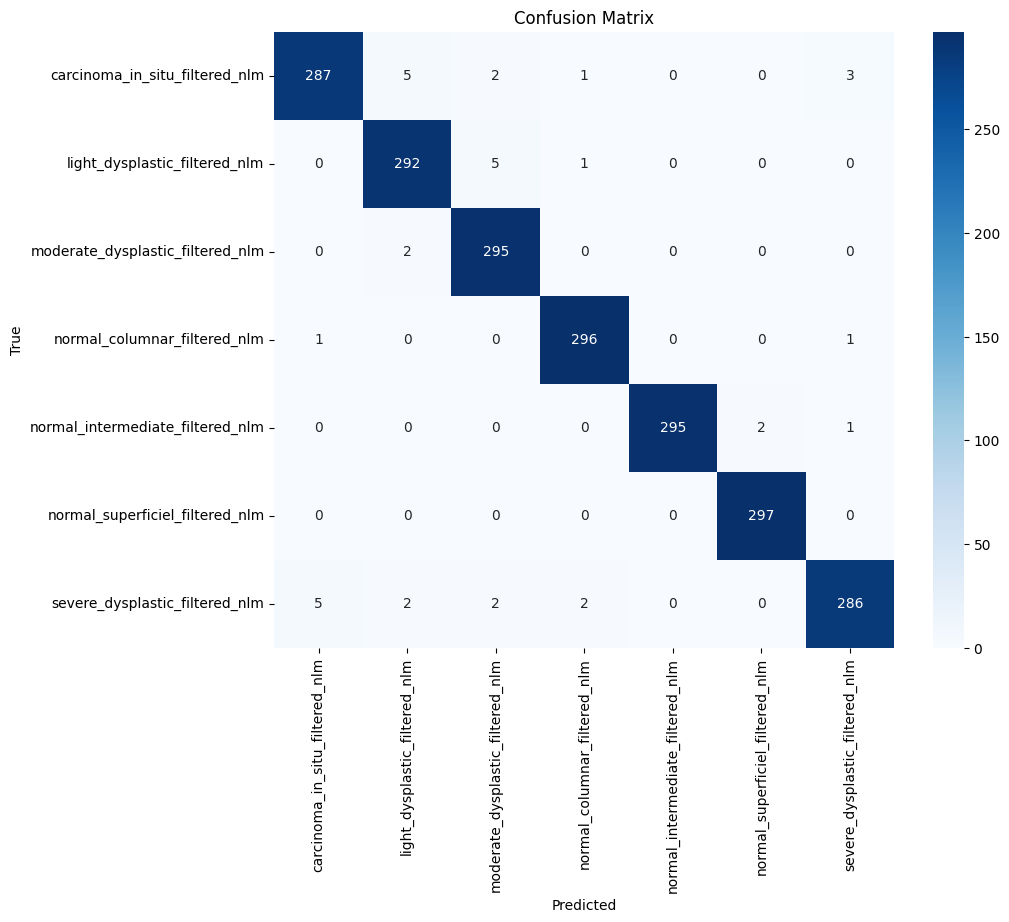

                              Class  Precision    Recall  F1 Score
0    carcinoma_in_situ_filtered_nlm   0.979522  0.963087  0.971235
1     light_dysplastic_filtered_nlm   0.970100  0.979866  0.974958
2  moderate_dysplastic_filtered_nlm   0.970395  0.993266  0.981697
3      normal_columnar_filtered_nlm   0.986667  0.993289  0.989967
4  normal_intermediate_filtered_nlm   1.000000  0.989933  0.994941
5   normal_superficiel_filtered_nlm   0.993311  1.000000  0.996644
6    severe_dysplastic_filtered_nlm   0.982818  0.962963  0.972789


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Make Predictions
y_pred = resnet50v2.predict(test_generator)

# Convert Predictions and True Labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_generator.classes

# Create the Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)


# Create a dictionary to map class indices to class names
class_indices = test_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}


# Calculate precision, recall, and F1 score for each class
precision = precision_score(y_true_classes, y_pred_classes, average=None)
recall = recall_score(y_true_classes, y_pred_classes, average=None)
f1 = f1_score(y_true_classes, y_pred_classes, average=None)

# Visualize the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices,
            yticklabels=test_generator.class_indices)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Create a list of class names
class_names_list = [class_names[i] for i in range(len(class_indices))]

# Create a DataFrame to organize the results
results_df = pd.DataFrame({
    'Class': class_names_list,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Print the results table
print(results_df)


# **ResNet101**

In [ ]:
# resnet101 = tf.keras.models.load_model('/content/drive/MyDrive/Model/ResNet101V2_model.h5')

In [ ]:
train_loss, train_accuracy = resnet101.evaluate(train_generator)

print(f'Train accuracy: {train_accuracy:.4f}')

757/757 [==============================] - 207s 272ms/step - loss: 0.0341 - accuracy: 0.9893
Train accuracy: 0.9893


In [ ]:
# Evaluate the model on the test data using the test generator
test_loss, test_accuracy = resnet101.evaluate(test_generator)

print(f'Test accuracy: {test_accuracy:.4f}')

131/131 [==============================] - 34s 262ms/step - loss: 0.0574 - accuracy: 0.9803
Test accuracy: 0.9803


131/131 [==============================] - 36s 260ms/step


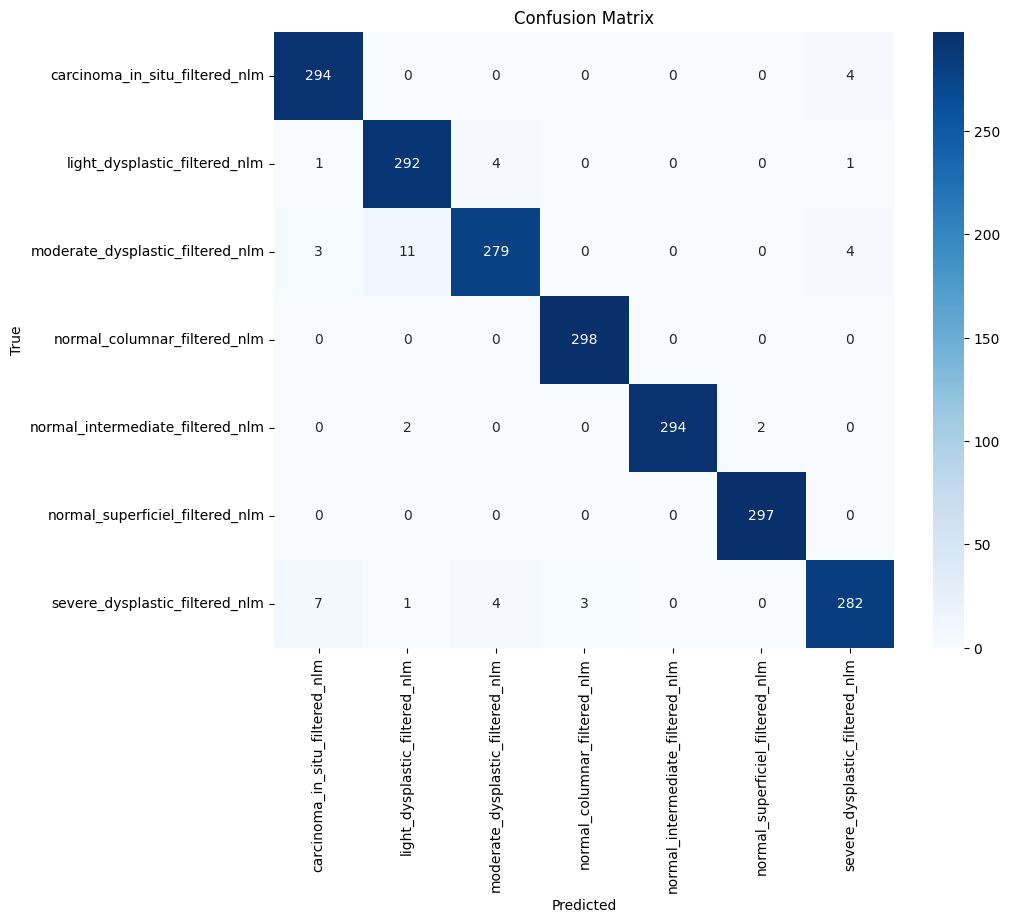

                              Class  Precision    Recall  F1 Score
0    carcinoma_in_situ_filtered_nlm   0.963934  0.986577  0.975124
1     light_dysplastic_filtered_nlm   0.954248  0.979866  0.966887
2  moderate_dysplastic_filtered_nlm   0.972125  0.939394  0.955479
3      normal_columnar_filtered_nlm   0.990033  1.000000  0.994992
4  normal_intermediate_filtered_nlm   1.000000  0.986577  0.993243
5   normal_superficiel_filtered_nlm   0.993311  1.000000  0.996644
6    severe_dysplastic_filtered_nlm   0.969072  0.949495  0.959184


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Make Predictions
y_pred = resnet101.predict(test_generator)

# Convert Predictions and True Labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_generator.classes

# Create the Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)


# Create a dictionary to map class indices to class names
class_indices = test_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}


# Calculate precision, recall, and F1 score for each class
precision = precision_score(y_true_classes, y_pred_classes, average=None)
recall = recall_score(y_true_classes, y_pred_classes, average=None)
f1 = f1_score(y_true_classes, y_pred_classes, average=None)

# Visualize the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices,
            yticklabels=test_generator.class_indices)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Create a list of class names
class_names_list = [class_names[i] for i in range(len(class_indices))]

# Create a DataFrame to organize the results
results_df = pd.DataFrame({
    'Class': class_names_list,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Print the results table
print(results_df)


# **DenseNet121**

In [ ]:
# densenet121 = tf.keras.models.load_model('/content/drive/MyDrive/Model/DenseNet121_model.h5')

In [ ]:
train_loss, train_accuracy = densenet121.evaluate(train_generator)

print(f'Train accuracy: {train_accuracy:.4f}')

757/757 [==============================] - 202s 261ms/step - loss: 0.1793 - accuracy: 0.9340
Train accuracy: 0.9340


In [ ]:
# Evaluate the model on the test data using the test generator
test_loss, test_accuracy = densenet121.evaluate(test_generator)

print(f'Test accuracy: {test_accuracy:.4f}')

131/131 [==============================] - 35s 266ms/step - loss: 0.2473 - accuracy: 0.9102
Test accuracy: 0.9102


131/131 [==============================] - 35s 244ms/step


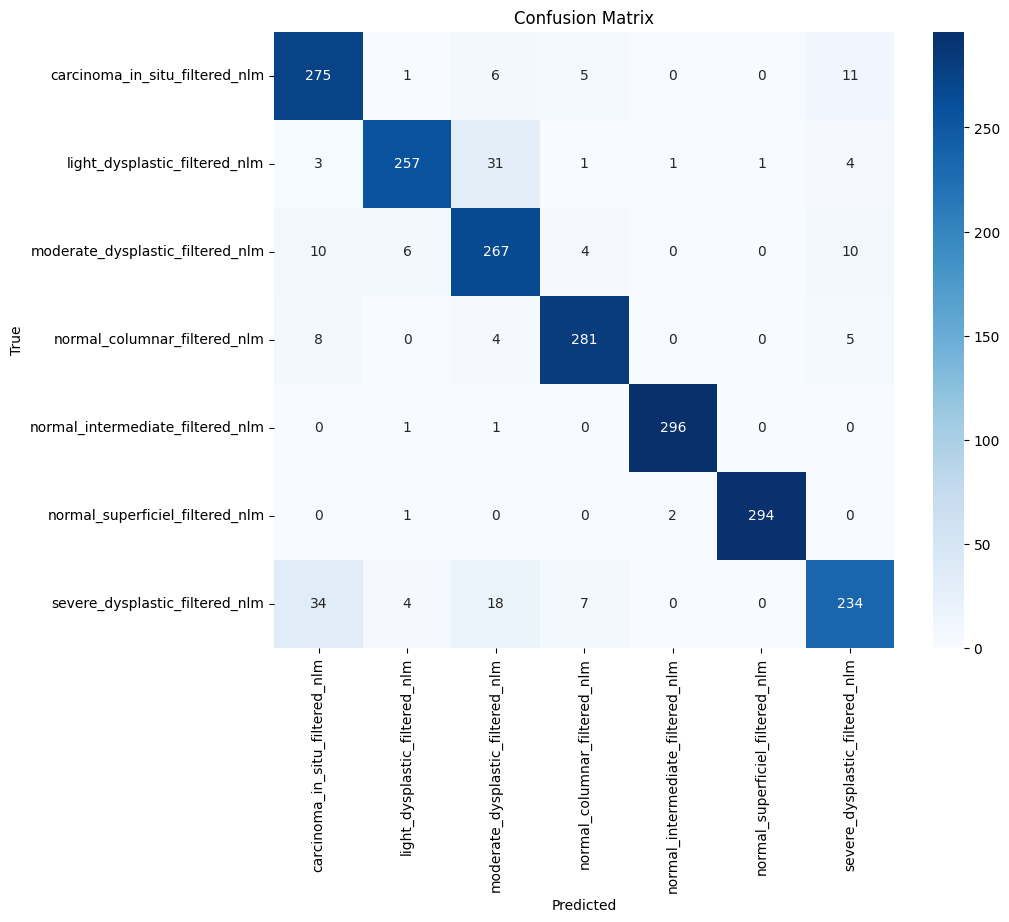

                              Class  Precision    Recall  F1 Score
0    carcinoma_in_situ_filtered_nlm   0.833333  0.922819  0.875796
1     light_dysplastic_filtered_nlm   0.951852  0.862416  0.904930
2  moderate_dysplastic_filtered_nlm   0.816514  0.898990  0.855769
3      normal_columnar_filtered_nlm   0.942953  0.942953  0.942953
4  normal_intermediate_filtered_nlm   0.989967  0.993289  0.991625
5   normal_superficiel_filtered_nlm   0.996610  0.989899  0.993243
6    severe_dysplastic_filtered_nlm   0.886364  0.787879  0.834225


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Make Predictions
y_pred = densenet121.predict(test_generator)

# Convert Predictions and True Labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_generator.classes

# Create the Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)


# Create a dictionary to map class indices to class names
class_indices = test_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}


# Calculate precision, recall, and F1 score for each class
precision = precision_score(y_true_classes, y_pred_classes, average=None)
recall = recall_score(y_true_classes, y_pred_classes, average=None)
f1 = f1_score(y_true_classes, y_pred_classes, average=None)

# Visualize the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices,
            yticklabels=test_generator.class_indices)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Create a list of class names
class_names_list = [class_names[i] for i in range(len(class_indices))]

# Create a DataFrame to organize the results
results_df = pd.DataFrame({
    'Class': class_names_list,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Print the results table
print(results_df)


# **DenseNet169**

In [ ]:
# densenet169 = tf.keras.models.load_model('/content/drive/MyDrive/Model/DenseNet169_model.h5')

In [ ]:
train_loss, train_accuracy = densenet169.evaluate(train_generator)

print(f'Train accuracy: {train_accuracy:.4f}')

757/757 [==============================] - 204s 265ms/step - loss: 0.0928 - accuracy: 0.9666
Train accuracy: 0.9666


In [ ]:
# Evaluate the model on the test data using the test generator
test_loss, test_accuracy = densenet169.evaluate(test_generator)

print(f'Test accuracy: {test_accuracy:.4f}')

131/131 [==============================] - 34s 262ms/step - loss: 0.1526 - accuracy: 0.9549
Test accuracy: 0.9549


131/131 [==============================] - 36s 252ms/step


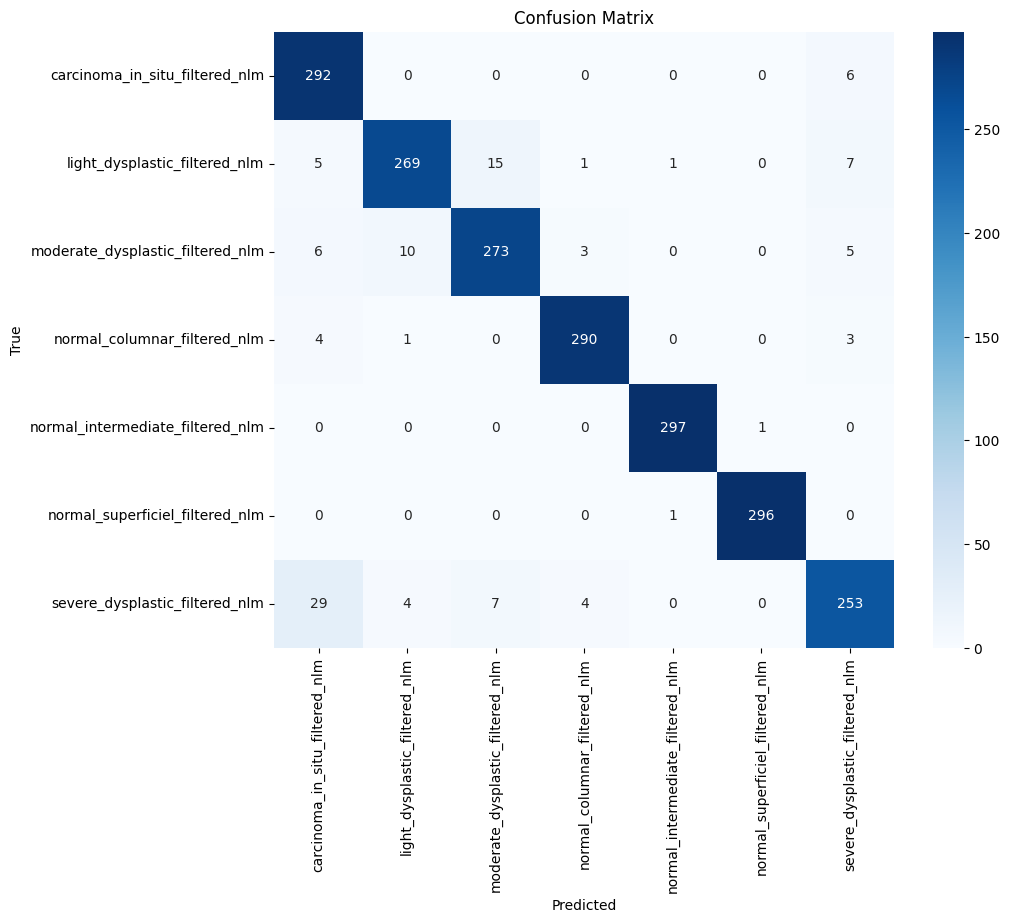

                              Class  Precision    Recall  F1 Score
0    carcinoma_in_situ_filtered_nlm   0.869048  0.979866  0.921136
1     light_dysplastic_filtered_nlm   0.947183  0.902685  0.924399
2  moderate_dysplastic_filtered_nlm   0.925424  0.919192  0.922297
3      normal_columnar_filtered_nlm   0.973154  0.973154  0.973154
4  normal_intermediate_filtered_nlm   0.993311  0.996644  0.994975
5   normal_superficiel_filtered_nlm   0.996633  0.996633  0.996633
6    severe_dysplastic_filtered_nlm   0.923358  0.851852  0.886165


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Make Predictions
y_pred = densenet169.predict(test_generator)

# Convert Predictions and True Labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_generator.classes

# Create the Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)


# Create a dictionary to map class indices to class names
class_indices = test_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}


# Calculate precision, recall, and F1 score for each class
precision = precision_score(y_true_classes, y_pred_classes, average=None)
recall = recall_score(y_true_classes, y_pred_classes, average=None)
f1 = f1_score(y_true_classes, y_pred_classes, average=None)

# Visualize the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices,
            yticklabels=test_generator.class_indices)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Create a list of class names
class_names_list = [class_names[i] for i in range(len(class_indices))]

# Create a DataFrame to organize the results
results_df = pd.DataFrame({
    'Class': class_names_list,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Print the results table
print(results_df)


# **XceptionNet**

In [ ]:
# xceptionnet = tf.keras.models.load_model('/content/drive/MyDrive/Model/XceptionNet_model.h5')

In [ ]:
train_loss, train_accuracy = xceptionnet.evaluate(train_generator)

print(f'Train accuracy: {train_accuracy:.4f}')

757/757 [==============================] - 200s 262ms/step - loss: 0.0739 - accuracy: 0.9747
Train accuracy: 0.9747


In [ ]:
# Evaluate the model on the test data using the test generator
test_loss, test_accuracy = xceptionnet.evaluate(test_generator)

print(f'Test accuracy: {test_accuracy:.4f}')

131/131 [==============================] - 35s 270ms/step - loss: 0.1228 - accuracy: 0.9587
Test accuracy: 0.9587


131/131 [==============================] - 35s 259ms/step


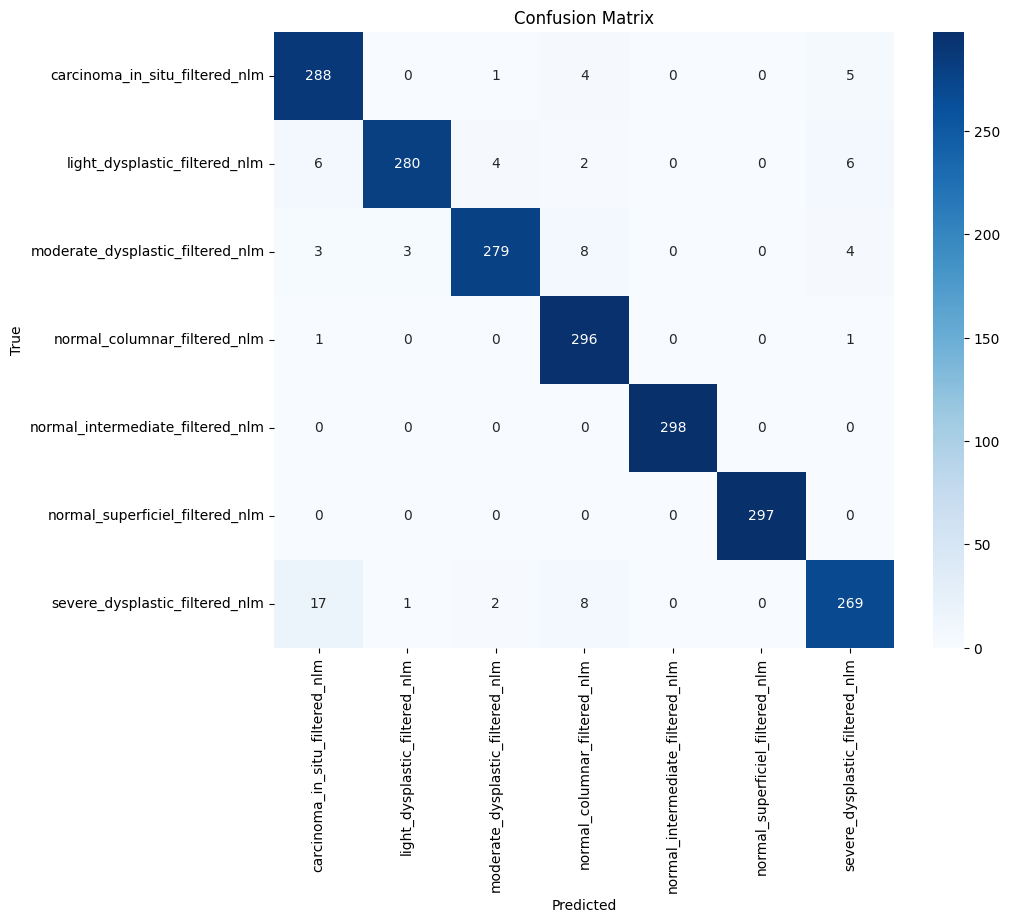

                              Class  Precision    Recall  F1 Score
0    carcinoma_in_situ_filtered_nlm   0.914286  0.966443  0.939641
1     light_dysplastic_filtered_nlm   0.985915  0.939597  0.962199
2  moderate_dysplastic_filtered_nlm   0.975524  0.939394  0.957118
3      normal_columnar_filtered_nlm   0.930818  0.993289  0.961039
4  normal_intermediate_filtered_nlm   1.000000  1.000000  1.000000
5   normal_superficiel_filtered_nlm   1.000000  1.000000  1.000000
6    severe_dysplastic_filtered_nlm   0.943860  0.905724  0.924399


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Make Predictions
y_pred = xceptionnet.predict(test_generator)

# Convert Predictions and True Labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_generator.classes

# Create the Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)


# Create a dictionary to map class indices to class names
class_indices = test_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}


# Calculate precision, recall, and F1 score for each class
precision = precision_score(y_true_classes, y_pred_classes, average=None)
recall = recall_score(y_true_classes, y_pred_classes, average=None)
f1 = f1_score(y_true_classes, y_pred_classes, average=None)

# Visualize the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices,
            yticklabels=test_generator.class_indices)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Create a list of class names
class_names_list = [class_names[i] for i in range(len(class_indices))]

# Create a DataFrame to organize the results
results_df = pd.DataFrame({
    'Class': class_names_list,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Print the results table
print(results_df)


# **InceptionResNetV2**

In [ ]:
# inceptionresnetv2  = tf.keras.models.load_model('/content/drive/MyDrive/Model/InceptionResNetV2_model.h5')

In [ ]:
train_loss, train_accuracy = inceptionresnetv2.evaluate(train_generator)

print(f'Train accuracy: {train_accuracy:.4f}')

757/757 [==============================] - 212s 273ms/step - loss: 0.0946 - accuracy: 0.9694
Train accuracy: 0.9694


In [ ]:
# Evaluate the model on the test data using the test generator
test_loss, test_accuracy = inceptionresnetv2.evaluate(test_generator)

print(f'Test accuracy: {test_accuracy:.4f}')

131/131 [==============================] - 35s 269ms/step - loss: 0.1646 - accuracy: 0.9486
Test accuracy: 0.9486


131/131 [==============================] - 37s 256ms/step


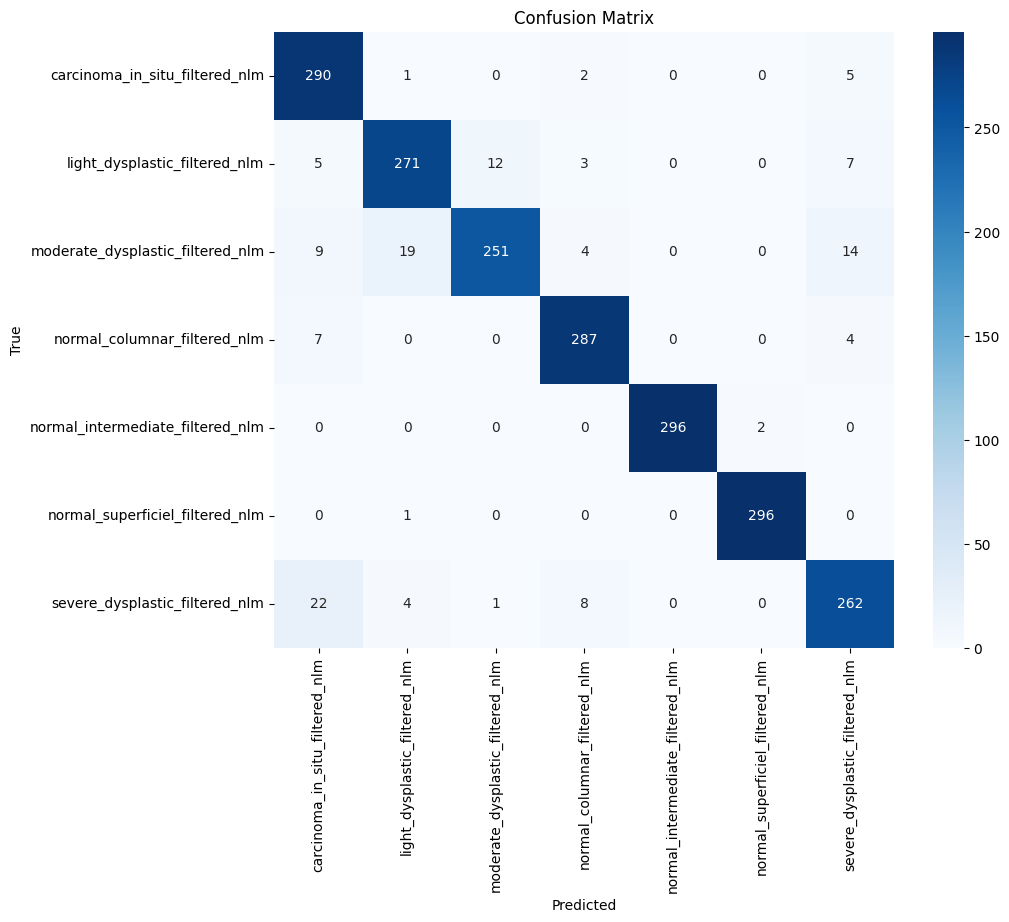

                              Class  Precision    Recall  F1 Score
0    carcinoma_in_situ_filtered_nlm   0.870871  0.973154  0.919176
1     light_dysplastic_filtered_nlm   0.915541  0.909396  0.912458
2  moderate_dysplastic_filtered_nlm   0.950758  0.845118  0.894831
3      normal_columnar_filtered_nlm   0.944079  0.963087  0.953488
4  normal_intermediate_filtered_nlm   1.000000  0.993289  0.996633
5   normal_superficiel_filtered_nlm   0.993289  0.996633  0.994958
6    severe_dysplastic_filtered_nlm   0.897260  0.882155  0.889643


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Make Predictions
y_pred = inceptionresnetv2.predict(test_generator)

# Convert Predictions and True Labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_generator.classes

# Create the Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)


# Create a dictionary to map class indices to class names
class_indices = test_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}


# Calculate precision, recall, and F1 score for each class
precision = precision_score(y_true_classes, y_pred_classes, average=None)
recall = recall_score(y_true_classes, y_pred_classes, average=None)
f1 = f1_score(y_true_classes, y_pred_classes, average=None)

# Visualize the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices,
            yticklabels=test_generator.class_indices)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Create a list of class names
class_names_list = [class_names[i] for i in range(len(class_indices))]

# Create a DataFrame to organize the results
results_df = pd.DataFrame({
    'Class': class_names_list,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Print the results table
print(results_df)


In [ ]:

# # Assuming you have defined `num_classes`
# num_classes = len(val_generator.class_indices)

# # Extract labels from the generator
# val_labels = val_generator.classes
# # Make predictions for each model
# resnet50v2_preds = resnet50v2.predict(val_generator)
# resnet101_preds = resnet101.predict(val_generator)
# densenet121_preds = densenet121.predict(val_generator)
# densenet169_preds = densenet169.predict(val_generator)
# xceptionnet_preds = xceptionnet.predict(val_generator)
# inceptionresnetv2_preds = inceptionresnetv2.predict(val_generator)

# # Stack the predictions
# stacked_predictions = np.hstack([resnet50v2_preds,resnet101_preds, densenet121_preds, densenet169_preds, xceptionnet_preds,inceptionresnetv2_preds])

# # Train a meta-model on stacked predictions
# meta_model = tf.keras.Sequential([
#     tf.keras.layers.Dense(128, activation='relu', input_shape=(num_classes*6,)),
#     tf.keras.layers.Dense(num_classes, activation='softmax')
# ])


# meta_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# # Train the meta-model
# meta_model.fit(stacked_predictions, val_labels, epochs=5, batch_size=16)


195/195 [==============================] - 58s 272ms/step
Epoch 1/5
195/195 [==============================] - 2s 3ms/step - loss: 0.3731 - accuracy: 0.9650
Epoch 2/5
195/195 [==============================] - 1s 3ms/step - loss: 0.0152 - accuracy: 0.9984
Epoch 3/5
195/195 [==============================] - 1s 3ms/step - loss: 0.0071 - accuracy: 0.9990
Epoch 4/5
195/195 [==============================] - 1s 3ms/step - loss: 0.0046 - accuracy: 0.9994
Epoch 5/5
195/195 [==============================] - 1s 3ms/step - loss: 0.0034 - accuracy: 0.9994


In [ ]:
# # Assuming you have a test set
# # Load and preprocess your test data

# test_labels = test_generator.classes

# # Make predictions using the ensemble
# test_resnet50v2_preds = resnet50v2.predict(test_generator)
# test_resnet101_preds = resnet101.predict(test_generator)
# test_densenet121_preds = densenet121.predict(test_generator)
# test_densenet169_preds = densenet169.predict(test_generator)
# test_xceptionnet_preds = xceptionnet.predict(test_generator)
# test_inceptionresnetv2_preds = inceptionresnetv2.predict(test_generator)

# stacked_test_predictions = np.hstack([test_resnet50v2_preds, test_resnet101_preds,
#                                       test_densenet121_preds, test_densenet169_preds,
#                                       test_xceptionnet_preds,test_inceptionresnetv2_preds])

# ensemble_predictions = meta_model.predict(stacked_test_predictions)

66/66 [==============================] - 0s 1ms/step


In [ ]:
# # Assuming you have true labels for the test set

# ensemble_accuracy = np.sum(np.argmax(ensemble_predictions, axis=1) == test_labels) / len(test_labels)
# print(f'Ensemble Accuracy: {ensemble_accuracy*100:.2f}%')


Ensemble Accuracy: 99.62%


1/1 [==============================] - 0s 102ms/step
Model: ResNet50V2
Predicted Class: moderate_dysplastic_filtered_nlm, Probability: 99.95%
Cancerous



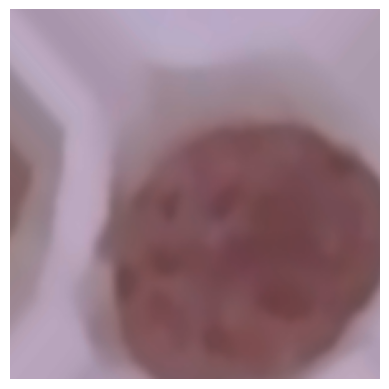

1/1 [==============================] - 0s 45ms/step
Model: ResNet101
Predicted Class: moderate_dysplastic_filtered_nlm, Probability: 99.93%
Cancerous



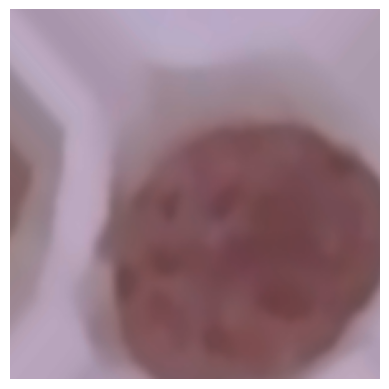

1/1 [==============================] - 0s 48ms/step
Model: DenseNet121
Predicted Class: moderate_dysplastic_filtered_nlm, Probability: 97.14%
Cancerous



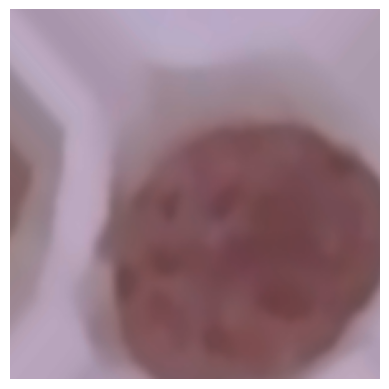

1/1 [==============================] - 0s 43ms/step
Model: DenseNet169
Predicted Class: moderate_dysplastic_filtered_nlm, Probability: 99.96%
Cancerous



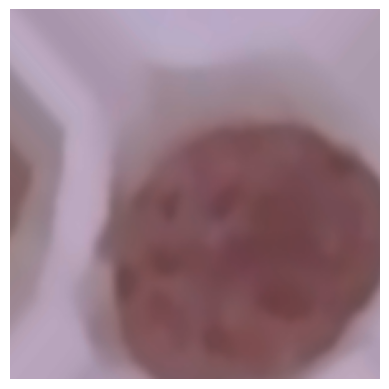

1/1 [==============================] - 0s 22ms/step
Model: XceptionNet
Predicted Class: moderate_dysplastic_filtered_nlm, Probability: 100.00%
Cancerous



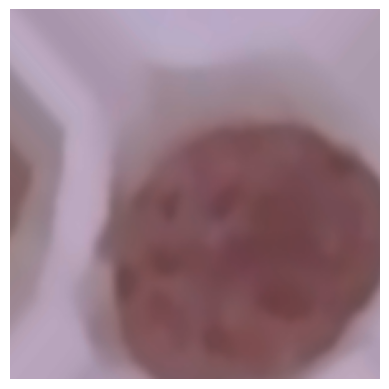

1/1 [==============================] - 0s 36ms/step
Model: InceptionResNetV2
Predicted Class: moderate_dysplastic_filtered_nlm, Probability: 99.75%
Cancerous



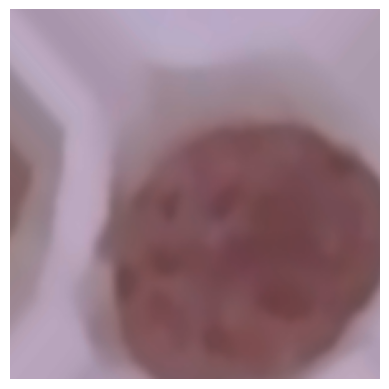

Final Prediction (Majority Voting): moderate_dysplastic_filtered_nlm, chances: 100.00%


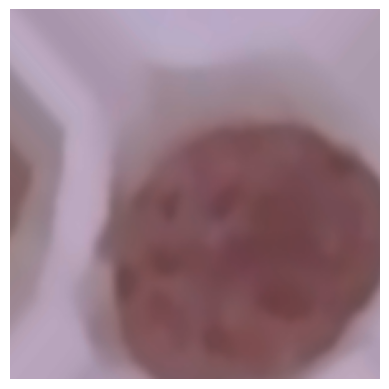

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
import tensorflow as tf

# Function to preprocess image for model input
def preprocess_image(image_path):
    # Load and preprocess the image
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image /= 255.0
    return image

# Define the determine_cancerous function
def determine_cancerous(class_name):
    cancerous_classes = {
        'carcinoma_in_situ_filtered_nlm': True,
        'light_dysplastic_filtered_nlm': True,
        'moderate_dysplastic_filtered_nlm': True,
        'normal_columnar_filtered_nlm': False,
        'normal_intermediate_filtered_nlm': False,
        'normal_superficiel_filtered_nlm': False,
        'severe_dysplastic_filtered_nlm': True,
    }

    return cancerous_classes.get(class_name, None)

# Assuming you have defined your test image path
test_image_path = '/content/cervix-cancer-Deep-learning/NEW_DATASET/test/moderate_dysplastic_filtered_nlm/153698259-153698268-002_filtered_5.png'

# Load and preprocess the test image
test_image = preprocess_image(test_image_path)

# Make predictions for each model
# Assuming you have defined the models and Classes_names

models = [resnet50v2, resnet101, densenet121, densenet169, xceptionnet, inceptionresnetv2]
model_names = ['ResNet50V2', 'ResNet101', 'DenseNet121', 'DenseNet169', 'XceptionNet', 'InceptionResNetV2']

Classes_names=['carcinoma_in_situ_filtered_nlm','light_dysplastic_filtered_nlm','moderate_dysplastic_filtered_nlm','normal_columnar_filtered_nlm','normal_intermediate_filtered_nlm','normal_superficiel_filtered_nlm','severe_dysplastic_filtered_nlm']

predicted_classes = []

for model, model_name in zip(models, model_names):
    preds = model.predict(test_image)
    class_idx = np.argmax(preds)
    class_prob = preds[0, class_idx]
    class_name = Classes_names[class_idx]
    # class_name = list(test_generator.class_indices.keys())[list(test_generator.class_indices.values()).index(class_idx)]

    # Determine if the class is cancerous
    is_cancerous = determine_cancerous(class_name)

    # Display the predicted class, probability, and cancerous status
    print(f'Model: {model_name}')
    print(f'Predicted Class: {class_name}, Probability: {class_prob*100:.2f}%')

    # Print whether it's cancerous or not
    if is_cancerous is not None:
        if is_cancerous:
            print('Cancerous')
        else:
            print('Non-cancerous')
    else:
        print('Class not found in dictionary')

    print()

    predicted_classes.append(class_name)

    # Display the image
    plt.imshow(tf.keras.preprocessing.image.load_img(test_image_path))
    plt.axis('off')
    plt.show()

# Convert class names to indices
class_indices = [Classes_names.index(class_name) for class_name in predicted_classes]
# class_indices = [test_generator.class_indices[class_name] for class_name in predicted_classes]

# Apply majority voting
majority_class_idx = np.argmax(np.bincount(class_indices))
chances = class_indices.count(majority_class_idx) / len(class_indices) * 100
majority_class_name = Classes_names[majority_class_idx]
# majority_class_name = list(test_generator.class_indices.keys())[list(test_generator.class_indices.values()).index(majority_class_idx)]


# Display the final prediction
print(f'Final Prediction (Majority Voting): {majority_class_name}, chances: {chances:.2f}%')

# Display the final image
plt.imshow(tf.keras.preprocessing.image.load_img(test_image_path))
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 44ms/step
Model: ResNet50V2
Predicted Class: severe_dysplastic, Probability: 98.38%



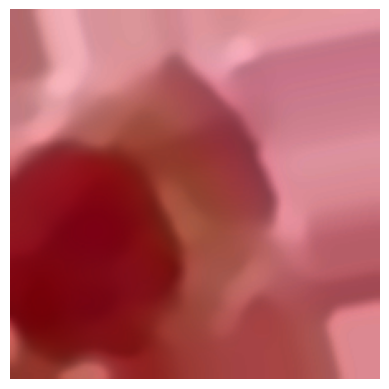

1/1 [==============================] - 0s 51ms/step
Model: ResNet101
Predicted Class: normal_columnar, Probability: 76.94%



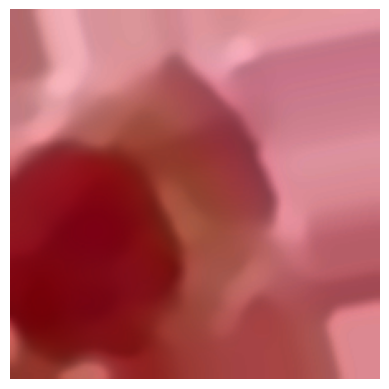

1/1 [==============================] - 0s 52ms/step
Model: DenseNet121
Predicted Class: severe_dysplastic, Probability: 97.16%



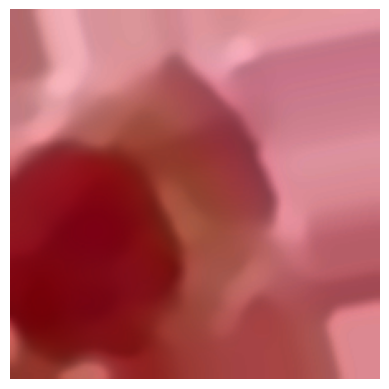

1/1 [==============================] - 0s 77ms/step
Model: DenseNet169
Predicted Class: normal_columnar, Probability: 99.94%



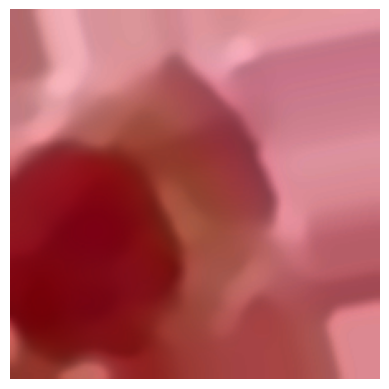

1/1 [==============================] - 0s 69ms/step
Model: XceptionNet
Predicted Class: normal_columnar, Probability: 99.98%



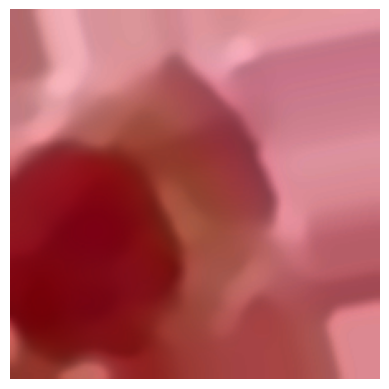

1/1 [==============================] - 0s 81ms/step
Model: InceptionResNetV2
Predicted Class: normal_columnar, Probability: 82.86%



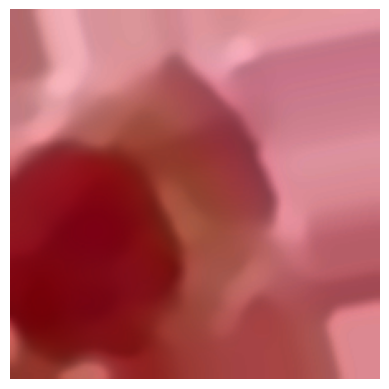

Final Prediction (Majority Voting): normal_columnar, Chances: 66.67%


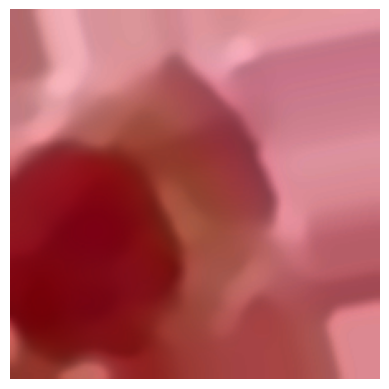

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.resnet_v2 import preprocess_input
import cv2

def nlm_filter(image):
    filtered_image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
    return filtered_image

# List of models and their corresponding names
models = [resnet50v2, resnet101, densenet121, densenet169, xceptionnet, inceptionresnetv2]
model_names = ['ResNet50V2', 'ResNet101', 'DenseNet121', 'DenseNet169', 'XceptionNet', 'InceptionResNetV2']

Classes_names=['carcinoma_in_situ','light_dysplastic','moderate_dysplastic','normal_columnar','normal_intermediate','normal_superficiel','severe_dysplastic']

# Replace with your actual image path
image_path = '/content/cervix-cancer-Deep-learning/NEW_DATASET/test/normal_columnar_filtered_nlm/augmented_0_3575.png'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Apply NLM filter
img_rgb_filtered = nlm_filter(img_rgb)

predicted_classes = []

# Loop through models
for model, model_name in zip(models, model_names):
    preds = model.predict(preprocess_input(np.expand_dims(img_rgb_filtered, axis=0)))
    class_idx = np.argmax(preds)
    class_prob = preds[0, class_idx]
    class_name = Classes_names[class_idx]

    # Display the predicted class and probability
    print(f'Model: {model_name}')
    print(f'Predicted Class: {class_name}, Probability: {class_prob*100:.2f}%')
    print()

    predicted_classes.append(class_name)

    # Display the image
    plt.imshow(img_rgb_filtered)
    plt.axis('off')
    plt.show()

# Convert class names to indices
class_indices = [Classes_names.index(class_name) for class_name in predicted_classes]

# Apply majority voting
majority_class_idx = np.argmax(np.bincount(class_indices))
chances = class_indices.count(majority_class_idx) / len(class_indices) * 100
majority_class_name = Classes_names[majority_class_idx]

# Display the final prediction
print(f'Final Prediction (Majority Voting): {majority_class_name}, Chances: {chances:.2f}%')

# Display the final image
plt.imshow(img_rgb_filtered)
plt.axis('off')
plt.show()
